# Cohort Analysis  

**Libraires**

In [68]:
import pandas as pd
import numpy as np
import datetime as dt

#for viz
import matplotlib.pyplot as plt
import seaborn as sns


#avoid warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Read data

In [2]:
df = pd.read_excel('Online Retail.xlsx')

#### 1.1 First 5 rows

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### 1.2 See Dimension 

In [4]:
df.shape

(541909, 8)

#### 1.3 General Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### 1.4 Check null Values

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

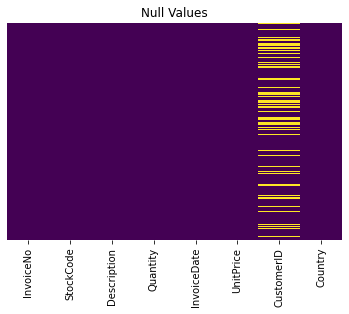

In [7]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False, cmap = 'viridis')
plt.title('Null Values')

plt.show()

#### 1.5 Check Duplicates

In [8]:
len(df[df.duplicated(subset=['InvoiceNo', 'CustomerID', 'Quantity'])])

413291

### 2. Clean Data

##### Filter null Values

In [9]:
#filter null values
df_clean = df[~df['CustomerID'].isnull()]

In [10]:
df_clean.shape

(406829, 8)

##### filter  Unit Price >0 And Quantyti >0

In [11]:
len(df_clean.query('Quantity <0'))

8905

In [12]:
df_clean = df_clean.query('Quantity >0 & UnitPrice>0')
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
df_clean.shape

(397884, 8)

In [14]:
len(df_clean[df_clean.duplicated(subset=['InvoiceNo', 'StockCode', 'Quantity'])])

5215

In [15]:
#drop duplicates

data = df_clean.drop_duplicates(subset=['InvoiceNo', 'StockCode', 
                                        'Quantity'],keep= 'first' )

In [16]:
data.shape

(392669, 8)

In [17]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 3. EDA

In [18]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [19]:
#Basic statistics

data.describe()

,Quantity,UnitPrice,CustomerID
count,392669.000000,392669.000000,392669.000000
mean,13.119245,3.106676,15287.916652
std,180.497397,21.523457,1713.513433
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


### 1. Top 10 whit more register Country

In [20]:
data['Country'].value_counts().head(10)

United Kingdom    349188
Germany             9023
France              8326
EIRE                7226
Spain               2479
Netherlands         2359
Belgium             2031
Switzerland         1841
Portugal            1453
Australia           1181
Name: Country, dtype: int64

### 2. Wich Country has the highest prices?

In [21]:
a = data.groupby(['Country'], as_index = False)['UnitPrice'].sum().sort_values(by = 'UnitPrice', ascending = False)
b = a.head(10)
b

,Country,UnitPrice
35,United Kingdom,1037750.823
13,France,36788.980
14,Germany,32526.180
10,EIRE,32134.960
30,Spain,9492.390
26,Portugal,8636.430
3,Belgium,7372.850
29,Singapore,6956.080
32,Switzerland,6389.270
23,Netherlands,6247.730


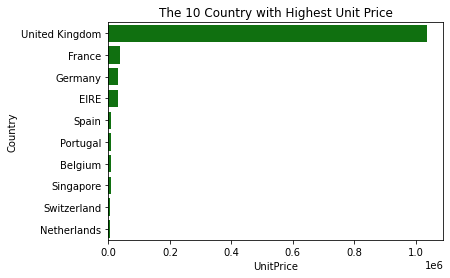

In [22]:
sns.barplot(y= b['Country'], x = b['UnitPrice'], color = 'Green')
plt.title('The 10 Country with Highest Unit Price')
plt.show()

### Wich Country has the highest Quantity?

In [23]:
a = data.groupby(['Country'], as_index = False)['Quantity'].sum().sort_values(by = 'Quantity', ascending = False)
b = a.head(10)
b

,Country,Quantity
35,United Kingdom,4240832
23,Netherlands,200361
10,EIRE,140133
14,Germany,119152
13,France,111428
0,Australia,83891
31,Sweden,36078
32,Switzerland,30082
30,Spain,27933
19,Japan,26016


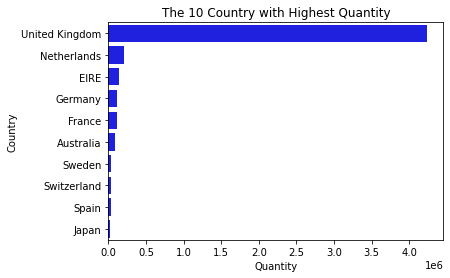

In [24]:
sns.barplot(y= b['Country'], x = b['Quantity'], color = 'Blue')
plt.title('The 10 Country with Highest Quantity')
plt.show()

In [25]:
a = data.set_index('InvoiceDate').sort_index(ascending = True)
b = a[['Quantity']]

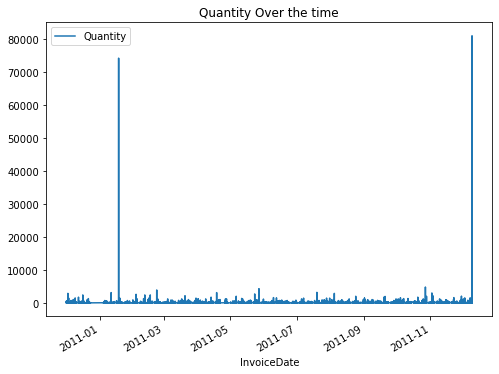

In [26]:
b.plot(figsize = [8,6]).set_title('Quantity Over the time')
plt.show()

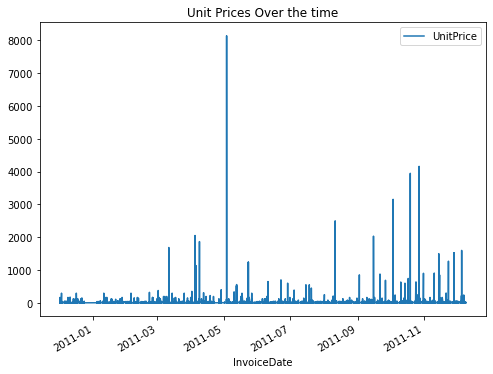

In [27]:
a = data.set_index('InvoiceDate').sort_index(ascending = True)
b = a[['UnitPrice']]
b.plot(figsize = [8,6]).set_title('Unit Prices Over the time')
plt.show()

In [28]:
p = data.set_index('InvoiceDate').sort_index(ascending = True)[['Country', 'Quantity', 'UnitPrice']]

### Filter Country and see the most Unit Prices at day

In [29]:
uk = data.query('Country =="United Kingdom"')

In [30]:
uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


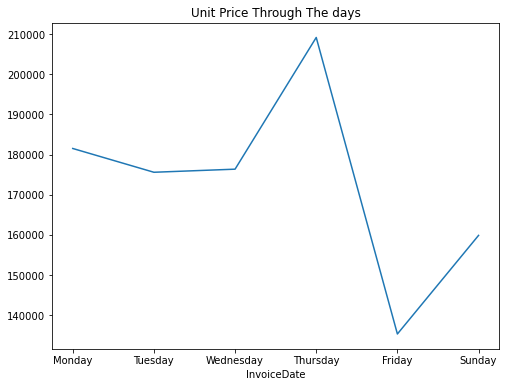

In [50]:
uk.groupby([uk['InvoiceDate'].dt.day_of_week,uk['InvoiceDate'].dt.day_name()])['UnitPrice'].sum()\
.droplevel(0, 'index').plot(figsize = [8,6])
plt.title('Unit Price Through The days')
plt.show()

#### Comment:

The Higest Unit Price are on Thursday, the lower are on fridays

#### Quantity Through The days

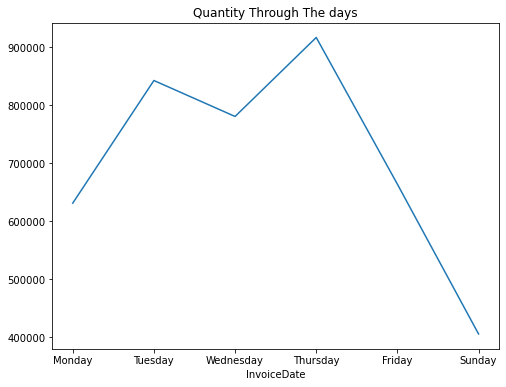

In [51]:
uk.groupby([uk['InvoiceDate'].dt.day_of_week,uk['InvoiceDate'].dt.day_name()])['Quantity'].sum()\
.droplevel(0, 'index').plot(figsize = [8,6])
plt.title('Quantity Through The days')
plt.show()

**Comment**:
- The Higest Quantity is on Thurday and lower is on sunday

## Cohort Analysis

In [53]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [59]:
#drop Custimer with no records or NA
df1= df.dropna(subset = ['CustomerID'])

In [60]:
df1.shape

(406829, 8)

In [69]:
#getting strating days ex: 2023-01-01
def getting_months(m):
    return dt.datetime(m.year, m.month,1)

In [84]:
df1['invoice_month'] = df1['InvoiceDate'].apply(getting_months)

In [85]:
df1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [94]:
#indexing the first month of visit of customer

df1['cohort_month']=df1.groupby('CustomerID')['invoice_month'].transform('min')

In [95]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice_month,cohort_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [93]:
#funtion to get day, year and month but series
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year 

In [97]:
_, invoice_month, invoice_year=get_date_elements(df1,'invoice_month')
_, cohort_month, cohort_year=get_date_elements(df1,'cohort_month')

In [102]:
#cohort index creation
yeardiffrence = invoice_year- cohort_year
monthdifference = invoice_month -cohort_month

In [124]:
df1['cohort_index'] = yeardiffrence * 12+ monthdifference +1
df1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice_month,cohort_month,cohort_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [125]:
#counting customer id
cohort_data = df1.groupby(['cohort_month','cohort_index'], as_index =False)['CustomerID'].apply(pd.Series.nunique)

In [126]:
cohort_data.head()

,cohort_month,cohort_index,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341


In [127]:
cohort_data.shape

(91, 3)

In [128]:
cohort_data.columns

Index(['cohort_month', 'cohort_index', 'CustomerID'], dtype='object')

In [129]:
#pivot Table

cohort_table = cohort_data.pivot(index='cohort_month', columns = 'cohort_index', values='CustomerID')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
cohort_table.index = cohort_table.index.strftime('%B %Y')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


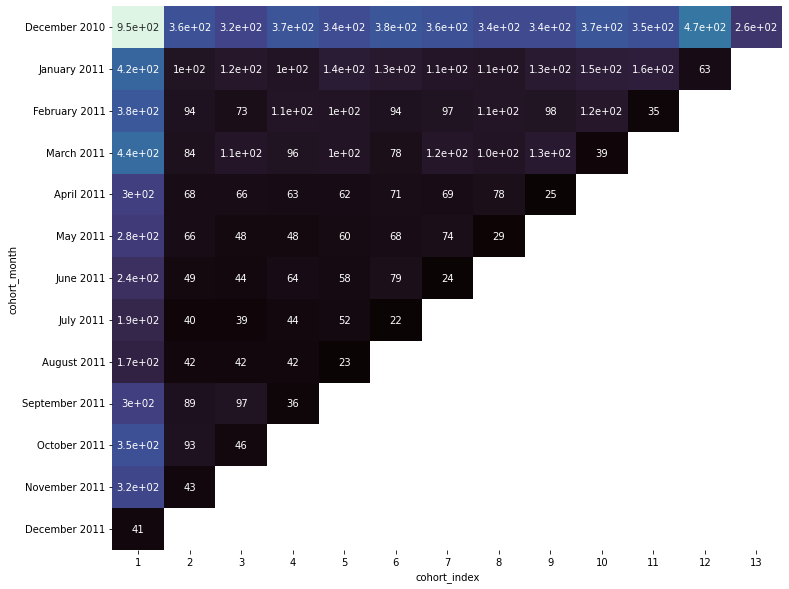

In [135]:
plt.figure(figsize = [12,10])
sns.heatmap(cohort_table, annot=True, cmap='mako', cbar=False)

plt.show()

In [139]:
#Cohort % analysis

cohort = cohort_table.divide(cohort_table.iloc[:,0], axis=0)

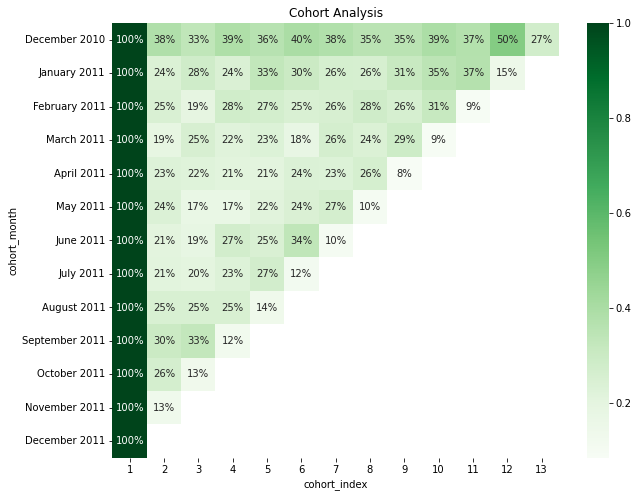

In [146]:
plt.figure(figsize = [10,8])
sns.heatmap(cohort, annot=True, cmap='Greens', fmt='.0%')
plt.title('Cohort Analysis')
plt.show()